In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
from pprint import pprint
import requests
import json
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)


df = pd.read_csv("main_cleaned.csv") #main data without coordinates
sdf = pd.read_csv("USA costs with latlon.csv") #harry's data

In [2]:
#cleaning up unnamed columns
df = df[[ 'Provider Id', 'Provider City', 'Provider Street Address',
       'Provider State', 'Provider name', 'Hospital Ownership',
       'Hospital overall rating', ' Average Total Payments ',
       'Average Medicare Payments', 'BEDS', 'Cost']]


#creating a new series that contains the location for each hospital
df['location'] = df['Provider Street Address'] + ", " + df['Provider City'] + ", " + df['Provider State']

#choose the column I want from Harry's data
sdf =sdf [['Provider Id',  'Latitude',
       'Longitude']]


#marged to main data
df = pd.merge(df,sdf, on = "Provider Id",how = "inner" )


#clean up
df = df.drop_duplicates(subset = 'Longitude') #this clean up any bad coordinates



#save the lat/lon data to main_csv
df.to_csv("main_cleaned_coordinates.csv")

In [3]:
df.columns

Index(['Provider Id', 'Provider City', 'Provider Street Address',
       'Provider State', 'Provider name', 'Hospital Ownership',
       'Hospital overall rating', ' Average Total Payments ',
       'Average Medicare Payments', 'BEDS', 'Cost', 'location', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
df.head()

,Provider Id,Provider City,Provider Street Address,Provider State,Provider name,Hospital Ownership,Hospital overall rating,Average Total Payments,Average Medicare Payments,BEDS,Cost,location,Latitude,Longitude
0,10001,DOTHAN,1108 ROSS CLARK CIRCLE,AL,SOUTHEAST ALABAMA MEDICAL CENTER,Government,3,5777.24,4763.73,420.0,1013.51,"1108 ROSS CLARK CIRCLE, DOTHAN, AL",31.215884,-85.363008
1,10005,BOAZ,2505 U S HIGHWAY 431 NORTH,AL,MARSHALL MEDICAL CENTER SOUTH,Government,2,5787.57,4976.71,150.0,810.86,"2505 U S HIGHWAY 431 NORTH, BOAZ, AL",34.221590,-86.160495
2,10006,FLORENCE,205 MARENGO STREET,AL,ELIZA COFFEE MEMORIAL HOSPITAL,Government,2,5434.95,4453.79,328.0,981.16,"205 MARENGO STREET, FLORENCE, AL",34.793962,-87.682691
3,10016,ALABASTER,1000 FIRST STREET NORTH,AL,SHELBY BAPTIST MEDICAL CENTER,Voluntary(non-profit),3,5658.33,4851.44,252.0,806.89,"1000 FIRST STREET NORTH, ALABASTER, AL",33.252414,-86.813044
4,10023,MONTGOMERY,2105 EAST SOUTH BOULEVARD,AL,BAPTIST MEDICAL CENTER SOUTH,Government,3,6653.80,5374.14,226.0,1279.66,"2105 EAST SOUTH BOULEVARD, MONTGOMERY, AL",32.326946,-86.271034


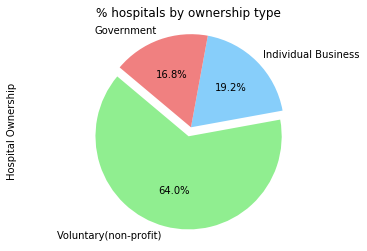

In [6]:
#ploting the percentage of hospitital ownership
df["Hospital Ownership"].value_counts(normalize= True).plot(
    kind = "pie",
    explode=[0.1,0,0],
    colors=["lightgreen", "lightskyblue", "lightcoral"],
    autopct="%1.1f%%",
    shadow=False, 
    startangle=140)
plt.title("% hospitals by ownership type")
plt.axis("equal") 

# plt.savefig("hospitals by ownership type.png")
plt.show()
plt.show()

In [7]:
#Voluntary information
voluntary_capacity = df.loc[df["Hospital Ownership"]=='Voluntary(non-profit)', 'BEDS']
voluntary_rating= df.loc[df["Hospital Ownership"]=='Voluntary(non-profit)', 'Hospital overall rating']
voluntary_color = "lightgreen"


#Government information
gov_capacity = df.loc[df["Hospital Ownership"]=='Government', 'BEDS']
gov_rating= df.loc[df["Hospital Ownership"]=='Government', 'Hospital overall rating']
gov_color = "lightcoral"


#Individual BUsiness
indvidual_capacity = df.loc[df["Hospital Ownership"]=='Individual Business', 'BEDS']
indvidual_rating= df.loc[df["Hospital Ownership"]=='Individual Business', 'Hospital overall rating']
indvidual_color = "lightskyblue"


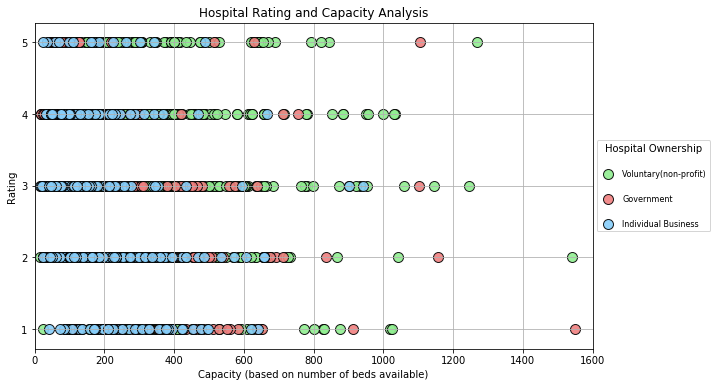

In [8]:
#set figure size before plotting
plt.figure(figsize=(10,6))

#plotting
plt.scatter(x = voluntary_capacity, y =voluntary_rating, s = 100,
             alpha = 0.9, c = voluntary_color , label='Voluntary(non-profit)',
            edgecolor="black", linewidths=1)
plt.scatter(x = gov_capacity, y =gov_rating, s = 100,
             alpha = 0.9, c = gov_color , label='Government',
            edgecolor="black", linewidths=1)
plt.scatter(x = indvidual_capacity, y =indvidual_rating, s = 100,
             alpha = 0.9, c = indvidual_color , label='Individual Business',
            edgecolor="black", linewidths=1)

# adding stuff
plt.title("Hospital Rating and Capacity Analysis")
plt.ylabel("Rating")
plt.xlabel("Capacity (based on number of beds available)")
plt.xlim(0,1600)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, title="Hospital Ownership" , labelspacing = 2)

plt.show()

In [9]:
#hospital_ownsership_summary
hospital_ownsership_summary = df.groupby('Hospital Ownership')['BEDS','Hospital overall rating'].mean()
hospital_ownsership_summary

,BEDS,Hospital overall rating
Hospital Ownership,,
Government,192.988189,2.929134
Individual Business,193.910653,2.597938
Voluntary(non-profit),242.296488,3.158058


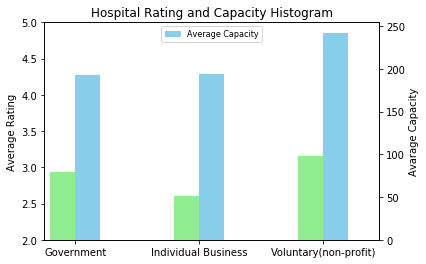

In [10]:
# Bar Graph Version
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

df.groupby('Hospital Ownership')['Hospital overall rating'].mean().plot(
    kind='bar', color='lightgreen', ax=ax, width=width, position=1, label="Average Rating",rot=0, ylim = (2,5))
df.groupby('Hospital Ownership')['BEDS'].mean().plot(
    kind='bar', color='skyblue', ax=ax2, width=width, position=0, label = "Average Capacity",rot=0)

plt.title("Hospital Rating and Capacity Histogram")

ax.set_ylabel('Average Rating')

ax2.set_ylabel('Avarage Capacity')
ax.set_xlabel("")
plt.legend(loc='upper center',  fontsize=8, labelspacing = 2)


plt.show()



In [11]:
one  = df.loc[df['Hospital overall rating']== 1, 'Hospital Ownership'].value_counts().to_dict()
two  = df.loc[df['Hospital overall rating']== 2, 'Hospital Ownership'].value_counts().to_dict()
three  = df.loc[df['Hospital overall rating']== 3, 'Hospital Ownership'].value_counts().to_dict()
four = df.loc[df['Hospital overall rating']== 4, 'Hospital Ownership'].value_counts().to_dict()
five  = df.loc[df['Hospital overall rating']== 5, 'Hospital Ownership'].value_counts().to_dict()


In [12]:
newdf = pd.DataFrame([one,two,three,four,five])
newdf["Rating"]=[1,2,3,4,5]
hospital_type_rating = newdf[['Rating','Government', 'Individual Business', 'Voluntary(non-profit)']]
hospital_type_rating

,Rating,Government,Individual Business,Voluntary(non-profit)
0,1,30,44,73
1,2,53,103,201
2,3,88,84,292
3,4,71,46,304
4,5,12,14,98


In [13]:
df.groupby('Hospital Ownership')['Cost'].describe()

,count,mean,std,min,25%,50%,75%,max
Hospital Ownership,,,,,,,,
Government,254.0,996.175748,389.515585,205.82,797.4675,926.18,1040.0000,3464.77
Individual Business,291.0,1149.171649,916.041661,202.91,816.7250,943.16,1155.8000,10357.62
Voluntary(non-profit),968.0,1199.759277,858.206359,374.67,830.6400,958.86,1261.6275,14018.69


In [14]:
df['Hospital Ownership'].unique()

array(['Government', 'Voluntary(non-profit)', 'Individual Business'], dtype=object)

In [15]:
# Visualization for cost, rating, capacity for all ownership type 
cost_graph = go.Bar(x =[df['Hospital Ownership'].unique()[0],df['Hospital Ownership'].unique()[2], df['Hospital Ownership'].unique()[1]], 
                    y = df.groupby('Hospital Ownership')['Cost'].mean(),
                   name = "Cost", 
                   marker=dict(
        color='#b2df8a',
        line=dict(
            color='rgb(8,48,107)',
            width=1),
        ))


capa_graph = go.Bar(x =[df['Hospital Ownership'].unique()[0],df['Hospital Ownership'].unique()[2], df['Hospital Ownership'].unique()[1]], 
                    y = df.groupby('Hospital Ownership')['BEDS'].mean(),
                   name = "Capacity",
                   marker=dict(
        color='#a6cee3',
        line=dict(
            color='rgb(8,48,107)',
            width=1),
        ))

rating_graph = go.Bar(x =[df['Hospital Ownership'].unique()[0],df['Hospital Ownership'].unique()[2], df['Hospital Ownership'].unique()[1]], 
                    y = df.groupby('Hospital Ownership')['Hospital overall rating'].mean()*100,
                   name = "Rating",
                   marker=dict(
        color='#1f78b4',
        line=dict(
            color='rgb(8,48,107)',
            width=1),
        ))
data = [cost_graph, capa_graph, rating_graph ]

updatemenus = list([
    dict(type="buttons", x = -0.3,
       
         buttons=list([   
            dict(label = 'Cost Comparison', 
                 method = 'update',  
                 args = [{'visible': [True, False, False]}, 
                         {'title': 'Cost(USD) vs Ownership Type'
                          }]),
            dict(label = 'Capacity Comparison',
                 method = 'update',
                 args = [{'visible': [False, True, False]}, 
                         {'title': 'Capacity(Number of Beds) vs Ownership Type'
                          }]),
            dict(label = 'Rating Comparison',
                 method = 'update', 
                 args = [{'visible': [False, False, True]}, 
                         {'title': 'Rating(Out of 500) vs Ownership Type',
                          }]),
             dict(label = 'Overall Comparison',
                 method = 'update', 
                 args = [{'visible': [True, True, True,True]},  
                         {'title': 'Overall Comparison'
                          }])

       
    
]))])


layout = dict( title ="Overall Comparison", showlegend=True,  width=600,
    height=400,updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
py.offline.iplot(fig)


In [16]:
#Made this awesome geo scatter plot, WOOOT!
#input into plotly by scattergeo
gov = dict(type="scattergeo", locationmode="USA-states", name = df['Hospital Ownership'].unique()[0],
            text = df['Hospital Ownership'].unique()[0] , 
            lon = df.loc[df['Hospital Ownership']== df['Hospital Ownership'].unique()[0], 'Longitude'],
            lat = df.loc[df['Hospital Ownership']== df['Hospital Ownership'].unique()[0], 'Latitude'], 
             marker = dict(size=6, autocolorscale=True, colorscale='custom-colorscale',
            color = '#d7191c'))

vol = dict(type="scattergeo", locationmode="USA-states", name = df['Hospital Ownership'].unique()[1],
            text = df['Hospital Ownership'].unique()[1] , 
            lon = df.loc[df['Hospital Ownership']== df['Hospital Ownership'].unique()[1],'Longitude'],
            lat = df.loc[df['Hospital Ownership']== df['Hospital Ownership'].unique()[1], 'Latitude'], 
             marker = dict(size=6, autocolorscale=True, colorscale='custom-colorscale',
            color = '#fdae61'))

ind = dict(type="scattergeo", locationmode="USA-states", name = df['Hospital Ownership'].unique()[2],
            text = df['Hospital Ownership'].unique()[2] , 
            lon = df.loc[df['Hospital Ownership']== df['Hospital Ownership'].unique()[2], 'Longitude'],
            lat = df.loc[df['Hospital Ownership']== df['Hospital Ownership'].unique()[2], 'Latitude'], 
             marker = dict(size=6, autocolorscale=True, colorscale='custom-colorscale',
            color = '#2c7bb6'))

data = [gov,vol,ind]

layout = dict(title="Hospital Ownership Distribution in US", showlegend=True,
              geo = dict(scope='usa',projection = dict(type='albers usa'), 
                         showland=True, landcolor="#abd9e9"))

fig = dict(data=data, layout=layout)
py.offline.iplot(fig)